<a href="https://colab.research.google.com/github/ennioguzman91/DeepLearning/blob/master/Deep%20Learning/Bicocca%20-%20Advanced%20Machine%20Learning/Lab/Lab01/2_1_Hidden_Layer_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fully Connected Feed-Forward Network

In this notebook we will play with Feed-Forward FC-NN (Fully Connected Neural Network) for a *classification task*: 

Image Classification on MNIST Dataset

**RECALL**

In the FC-NN, the output of each layer is computed using the activations from the previous one, as follows:

$$h_{i} = \sigma(W_i h_{i-1} + b_i)$$

where ${h}_i$ is the activation vector from the $i$-th layer (or the input data for $i=0$), ${W}_i$ and ${b}_i$ are  the weight matrix and the bias vector for the $i$-th layer, respectively. 
<br><rb>
$\sigma(\cdot)$ is the activation function. In our example, we will use the *ReLU* activation function for the hidden layers and *softmax* for the last layer.

Our loss function will be the **categorical crossentropy**.

## Model definition
Keras supports two different kind of models: the [Sequential](http://keras.io/models/#sequential) model and the [Graph](http://keras.io/models/#graph) model. The former is used to build linear stacks of layer (so each layer has one input and one output), and the latter supports any kind of connection graph.

In our case we build a Sequential model with three [Dense](http://keras.io/layers/core/#dense) (aka fully connected) layers. Notice that the output layer has the softmax activation function. 

The resulting model is actually a `function` of its own inputs implemented using the Keras backend. 

We apply the binary crossentropy loss and choose SGD as the optimizer. 

Please remind that Keras supports a variety of different [optimizers](http://keras.io/optimizers/) and [loss functions](http://keras.io/objectives/), which you may want to check out. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Introducing ReLU

The **ReLu** function is defined as $f(x) = \max(0, x),$ [1]

A smooth approximation to the rectifier is the *analytic function*: $f(x) = \ln(1 + e^x)$

which is called the **softplus** function.

The derivative of softplus is $f'(x) = e^x / (e^x + 1) = 1 / (1 + e^{-x})$, i.e. the **logistic function**.

[1] [http://www.cs.toronto.edu/~fritz/absps/reluICML.pdf]() by G. E. Hinton 

## Data preparation (`keras.dataset`)

We will train our model on the fashion MNIST dataset, which consists of 60,000 28x28 grayscale images of the 10 fashion classes, along with a test set of 10,000 images. 

![](imgs/fashion-mnist-sprite.png)

Since this dataset is **provided** with Keras, we just ask the `keras.dataset` model for training and test data.

We will:

* download the data
* reshape data to be in vectorial form (original data are images)
* normalize between 0 and 1.

The `binary_crossentropy` loss expects a **one-hot-vector** as input, therefore we apply the `to_categorical` function from `keras.utilis` to convert integer labels to **one-hot-vectors**.

In [ ]:
from keras.datasets import fashion_mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Split Training and Validation Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train)

In [ ]:
train_test_split??

In [ ]:
X_train[0].shape

(784,)

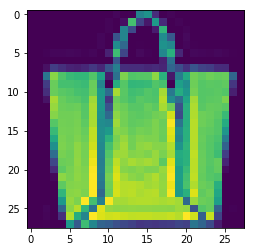

In [ ]:
plt.imshow(X_train[0].reshape(28, 28))

In [ ]:
print(np.asarray(range(10)))
print(Y_train[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 1 0]


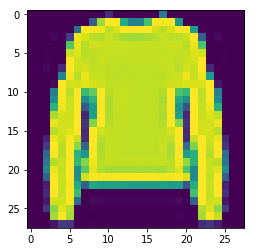

In [ ]:
plt.imshow(X_val[0].reshape(28, 28))

In [ ]:
print(np.asarray(range(10)))
print(Y_val[0].astype('int'))

[0 1 2 3 4 5 6 7 8 9]
[0 0 1 0 0 0 0 0 0 0]


## Training
Having defined and compiled the model, it can be trained using the `fit` function. We also specify a validation dataset to monitor validation loss and accuracy.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense

dims = X_train.shape[1]

nb_classes = 10

# FC@512+relu -> FC@512+relu -> FC@nb_classes+softmax
# ... your Code Here

model.compile(optimizer='sgd', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
n_epochs = 2
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

Train on 45000 samples, validate on 15000 samples
Epoch 1/2
45000/45000 [==============================] - 8s 173us/step - loss: 0.9777 - acc: 0.6900 - val_loss: 0.6718 - val_acc: 0.7771
Epoch 2/2
45000/45000 [==============================] - 7s 165us/step - loss: 0.6075 - acc: 0.7974 - val_loss: 0.5611 - val_acc: 0.8099


### Plotting Network Performance Trend
The return value of the `fit` function is a `keras.callbacks.History` object which contains the entire history of training/validation loss and accuracy, for each epoch. We can therefore plot the behaviour of loss and accuracy during the training phase.

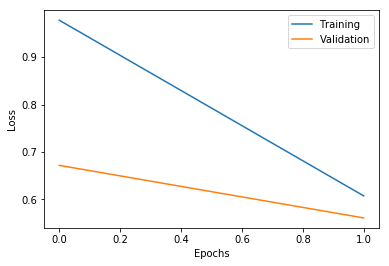

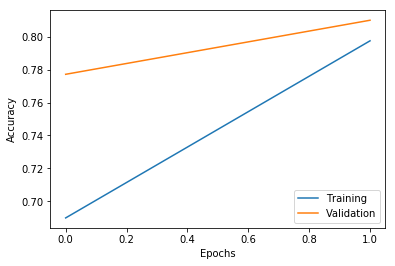

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

After `2` epochs, we get a `~80%` validation accuracy. 

* If you increase the number of epochs, you will get definitely better results.

### Quick Exercise: 

Try increasing the number of epochs (if you're hardware allows to)


In [ ]:
from tensorflow.keras.optimizers import SGD

# Your code here
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=2, verbose=1, validation_data=(X_val, Y_val))

---

# Inspecting Layers

In [ ]:
# We already used `summary`
model.summary()

### `model.layers` is iterable

In [ ]:
print('Model Input Tensors: ', model.input, end='\n\n')
print('Layers - Network Configuration:', end='\n\n')
for layer in model.layers:
    print(layer.name, layer.trainable)
    print('Layer Configuration:')
    print(layer.get_config(), end='\n{}\n'.format('----'*10))
print('Model Output Tensors: ', model.output)

Model Input Tensors:  Tensor("dense_13_input:0", shape=(?, 784), dtype=float32)

Layers - Network Configuration:

dense_13 True
Layer Configuration:
{'name': 'dense_13', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
----------------------------------------
dense_14 True
Layer Configuration:
{'name': 'dense_14', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_na

## Extract hidden layer representation of the given data

One **simple** way to do it is to use the weights of your model to build a new model that's truncated at the layer you want to read. 

Then you can run the `._predict(X_batch)` method to get the activations for a batch of inputs.

In [ ]:
model_truncated = Sequential()
model_truncated.add(Dense(512, activation='relu', input_shape=(784,)))
model_truncated.add(Dense(512, activation='relu'))

for i, layer in enumerate(model_truncated.layers):
    layer.set_weights(model.layers[i].get_weights())

model_truncated.compile(loss='categorical_crossentropy', optimizer=SGD(), 
              metrics=['accuracy'])

In [ ]:
import numpy as np
# Check
np.all(model_truncated.layers[0].get_weights()[0] == model.layers[0].get_weights()[0])

True

In [ ]:
hidden_features = model_truncated.predict(X_train)

In [ ]:
hidden_features.shape

(45000, 512)

In [ ]:
X_train.shape

(45000, 784)

#### Hint: Alternative Method to get activations 

(Using `keras.backend` `function` on Tensors)

```python
def get_activations(model, layer, X_batch):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((X_batch, False))
    return activations
```

---

### Generate the Embedding of Hidden Features

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(hidden_features[:1000]) ## Reduced for computational issues

In [ ]:
colors_map = np.argmax(Y_train, axis=1)

In [ ]:
X_tsne.shape

(1000, 2)

In [ ]:
nb_classes

10

In [ ]:
np.where(colors_map==6)

(array([   18,    30,    56, ..., 44939, 44958, 44992]),)

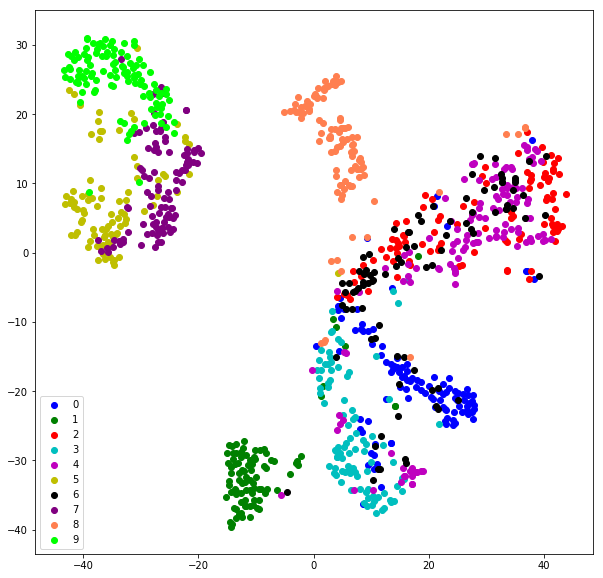

In [ ]:
colors = np.array([x for x in 'b-g-r-c-m-y-k-purple-coral-lime'.split('-')])
colors_map = colors_map[:1000]
plt.figure(figsize=(10,10))
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    plt.scatter(X_tsne[indices,0], X_tsne[indices, 1], c=colors[cl], label=cl)
plt.legend()
plt.show()

## Using Bokeh (Interactive Chart)

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [ ]:
p = figure(plot_width=600, plot_height=600)

colors = [x for x in 'blue-green-red-cyan-magenta-yellow-black-purple-coral-lime'.split('-')]
colors_map = colors_map[:1000]
output_notebook()
for cl in range(nb_classes):
    indices = np.where(colors_map==cl)
    p.circle(X_tsne[indices, 0].ravel(), X_tsne[indices, 1].ravel(), size=7, 
             color=colors[cl], alpha=0.4, legend_label=str(cl))

# show the results
p.legend.location = 'bottom_right'
show(p)

#### Note: We used `default` TSNE parameters. Better results can be achieved by tuning TSNE Hyper-parameters